In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import regex
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the CSV file into dataframe df
df = pd.read_csv('/kaggle/input/los-angeles-crime-data-2020-2023/Crime_Data_from_2020_to_Present.csv')

In [4]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
df = df.set_index('DR_NO')

In [7]:
df.dtypes

Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [8]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Column '{column}': {null_count} null values")

Column 'Date Rptd': 0 null values
Column 'DATE OCC': 0 null values
Column 'TIME OCC': 0 null values
Column 'AREA': 0 null values
Column 'AREA NAME': 0 null values
Column 'Rpt Dist No': 0 null values
Column 'Part 1-2': 0 null values
Column 'Crm Cd': 0 null values
Column 'Crm Cd Desc': 0 null values
Column 'Mocodes': 103915 null values
Column 'Vict Age': 0 null values
Column 'Vict Sex': 98911 null values
Column 'Vict Descent': 98917 null values
Column 'Premis Cd': 9 null values
Column 'Premis Desc': 442 null values
Column 'Weapon Used Cd': 494062 null values
Column 'Weapon Desc': 494062 null values
Column 'Status': 0 null values
Column 'Status Desc': 0 null values
Column 'Crm Cd 1': 10 null values
Column 'Crm Cd 2': 701125 null values
Column 'Crm Cd 3': 755269 null values
Column 'Crm Cd 4': 757085 null values
Column 'LOCATION': 0 null values
Column 'Cross Street': 635409 null values
Column 'LAT': 0 null values
Column 'LON': 0 null values


In [9]:
print(df.shape)

(757141, 27)


In [10]:
#dropping the columns 'Crm Cd 3' and 'Crm Cd 4' as they have large number of null values
columns_to_drop = ['Crm Cd 3','Crm Cd 4']
df = df.drop(columns=columns_to_drop)

In [11]:
#Both Crm Cd 1 and Crm Cd are same.
#dropping the column 'Crm Cd 1'
df = df.drop('Crm Cd 1', axis=1, inplace=False)
#replacing the null values in 'Crm Cd 2' with 0
df['Crm Cd 2'] = df['Crm Cd 2'].fillna(0, inplace=False)

In [12]:
df.loc[: ,'Cross Street'].head(10)

DR_NO
10304468     NaN
190101086    NaN
200110444    NaN
191501505    NaN
191921269    NaN
200100501    NaN
200100502    NaN
200100504    NaN
200100507    NaN
201710201    NaN
Name: Cross Street, dtype: object

In [13]:
# Filling missing values (NaN) in the columns 'Cross Street' and 'LOCATION' column with empty strings
df['Cross Street'] = df['Cross Street'].fillna('', inplace=False)
df['LOCATION'] = df['LOCATION'].fillna('', inplace=False)

In [14]:
# Convert the 'LOCATION' column to a string data type
df['LOCATION'] = df['LOCATION'].astype(str)

In [15]:
# This code combines the values from 'LOCATION' and 'Cross Street' columns into the 'LOCATION' column.
df['LOCATION'] = df['LOCATION']+df['Cross Street']

#drop 'Cross Street' column
df = df.drop('Cross Street', axis=1, inplace=False)

In [16]:
# Replacing sequences of two or more consecutive whitespace characters with a single space in the 'LOCATION' column
df['LOCATION'] = df['LOCATION'].str.replace(r'\s{2,}',' ')

In [17]:
df.loc[:,'LOCATION'].head(10)

DR_NO
10304468      1100 W  39TH                         PL
190101086      700 S  HILL                         ST
200110444      200 E  6TH                          ST
191501505     5400    CORTEEN                      PL
191921269    14400    TITUS                        ST
200100501                             700 S  BROADWAY
200100502      700 S  FIGUEROA                     ST
200100504      200 E  6TH                          ST
200100507      700    BERNARD                      ST
201710201    11900    BALBOA                       BL
Name: LOCATION, dtype: object

In [18]:
# Replace sequences of two or more consecutive whitespace characters with a single space in the 'Mocodes' column
df['Mocodes'] = df['Mocodes'].str.replace(r'\s{2,}',' ')
df.loc[:,'Mocodes'].head(10)

DR_NO
10304468               0444 0913
190101086         0416 1822 1414
200110444                   1501
191501505              0329 1402
191921269                   0329
200100501    0413 1822 1262 1415
200100502    1402 2004 0344 0387
200100504              1402 0392
200100507         1822 0344 1402
201710201    1300 0202 0378 0325
Name: Mocodes, dtype: object

In [19]:
print(df.loc[10304468, 'Mocodes'])

0444 0913


In [20]:
#Fill missing values (NaN) in 'Weapon Used Cd' column with 0
df.loc[df['Weapon Used Cd'].isna(), 'Weapon Used Cd'] = 0

# Fill missing values (NaN) in 'Weapon Desc' column with 'No weapons identified'
df.loc[df['Weapon Desc'].isna(), 'Weapon Desc'] = 'No weapons identified'

In [21]:
df.loc[:, ['Date Rptd', 'DATE OCC']].head(10)

,Date Rptd,DATE OCC
DR_NO,,
10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM
190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM
200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM
191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM
191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM
200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM
200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM
200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM
200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM


In [22]:
# Remove the last 11 characters i.e, ' 12:00:00 AM' from each value in the 'Date Rptd' and 'DATE OCC' column
df.loc[:,['Date Rptd']] = df['Date Rptd'].str[:-11]
df.loc[:,['DATE OCC']] = df['DATE OCC'].str[:-11]

In [23]:
df.loc[: ,['Date Rptd' ,'DATE OCC']].head(10)

,Date Rptd,DATE OCC
DR_NO,,
10304468,01/08/2020,01/08/2020
190101086,01/02/2020,01/01/2020
200110444,04/14/2020,02/13/2020
191501505,01/01/2020,01/01/2020
191921269,01/01/2020,01/01/2020
200100501,01/02/2020,01/01/2020
200100502,01/02/2020,01/02/2020
200100504,01/04/2020,01/04/2020
200100507,01/04/2020,01/04/2020


In [24]:
df.loc[: ,'TIME OCC'].head(10)

DR_NO
10304468     2230
190101086     330
200110444    1200
191501505    1730
191921269     415
200100501      30
200100502    1315
200100504      40
200100507     200
201710201    1925
Name: TIME OCC, dtype: int64

TIME OCC column is not in the right format and there are few Discripencies(Like 30, 40 as shown below and inserting ':' to correctly represent in the format HH:MM )

Changing 30 to 00:30
Correcting the Format of the ones that are meaningful - 1200 to 12:00

In [25]:
df['TIME OCC'] = df['TIME OCC'].astype(str)
# Pad the 'TIME OCC' column values with leading zeros to ensure a 4-digit format
df['TIME OCC'] = df['TIME OCC'].str.zfill(4)
# Format the 'TIME OCC' column as 'HH:MM' (hour:minute)
df['TIME OCC'] = df['TIME OCC'].str[:-2] + ':' + df['TIME OCC'].str[-2:]


In [26]:
df.loc[: ,'TIME OCC'].head(10)

DR_NO
10304468     22:30
190101086    03:30
200110444    12:00
191501505    17:30
191921269    04:15
200100501    00:30
200100502    13:15
200100504    00:40
200100507    02:00
201710201    19:25
Name: TIME OCC, dtype: object

In [27]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Age' is either 0 or NaN
df = df[(df['Vict Age'] != 0)& (df['Vict Age'].notna())]
df.loc[:,'Vict Age'].head(10)

DR_NO
10304468     36
190101086    25
191501505    76
191921269    31
200100501    25
200100502    23
200100507    23
200100509    29
200100510    35
200100514    41
Name: Vict Age, dtype: int64

In [28]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Sex' is 'X' (Unknown), 'H' (invalid), or NaN

df = df[(df['Vict Sex'] != 'X')& (df['Vict Sex'] != 'H')&(df['Vict Sex'].notna())]
df.loc[: ,'Vict Sex'].head(10)

DR_NO
10304468     F
190101086    M
191501505    F
200100501    F
200100502    M
200100507    M
200100509    M
200100510    M
200100514    M
200100520    F
Name: Vict Sex, dtype: object

In [29]:
print(df['Vict Descent'].unique())

['B' 'H' 'W' 'A' 'O' 'C' 'F' 'K' 'X' 'I' 'V' 'Z' 'J' 'P' 'G' 'U' 'D' nan
 'S' 'L' '-']


In [30]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Descent' is '-' or missing (NaN)
df = df[(df['Vict Descent'] != '-') & (df['Vict Descent'].notna())]
df.loc[: ,'Vict Descent'].head(10)

DR_NO
10304468     B
190101086    H
191501505    W
200100501    H
200100502    H
200100507    B
200100509    A
200100510    O
200100514    A
200100520    H
Name: Vict Descent, dtype: object

In [31]:
# Filter the DataFrame 'df' to exclude rows where 'LAT' or 'LON' is 0 or NaN
df = df[(df['LAT'] != 0)& (df['LON'] != 0)&(df['LAT'].notna()) & (df['LON'].notna())]

In [32]:
#Dropping AREA as both 'AREA' and 'AREA NAME' represent the same.
df = df.drop('AREA', axis=1, inplace=False)
df = df.drop('Status', axis=1, inplace=False)

In [33]:
# Drop rows with missing values (NaN) from the DataFrame 'df'
df = df.dropna()

In [34]:
print(df.shape)

(559167, 21)


In [35]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,Crm Cd 2,LOCATION,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,,,,
10304468,01/08/2020,01/08/2020,22:30,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,0.0,1100 W 39TH PL,34.0141,-118.2978
190101086,01/02/2020,01/01/2020,03:30,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,0.0,700 S HILL ST,34.0459,-118.2545
191501505,01/01/2020,01/01/2020,17:30,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,No weapons identified,Invest Cont,998.0,5400 CORTEEN PL,34.1685,-118.4019
200100501,01/02/2020,01/01/2020,00:30,Central,163,1,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,...,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,998.0,700 S BROADWAY,34.0452,-118.2534
200100502,01/02/2020,01/02/2020,13:15,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,23,...,H,404.0,DEPARTMENT STORE,0.0,No weapons identified,Invest Cont,998.0,700 S FIGUEROA ST,34.0483,-118.2631


In [36]:
features_of_interest = ["Vict Age", "LAT", "LON"]
numerical_summary = df[features_of_interest].describe()
mode_age = df['Vict Age'].mode().values[0]
print(numerical_summary.loc[['mean', 'std']])
print(f"Mode of Victim Age: {mode_age}")

       Vict Age        LAT         LON
mean  39.758954  34.075527 -118.356631
std   15.529560   0.110294    0.105658
Mode of Victim Age: 30


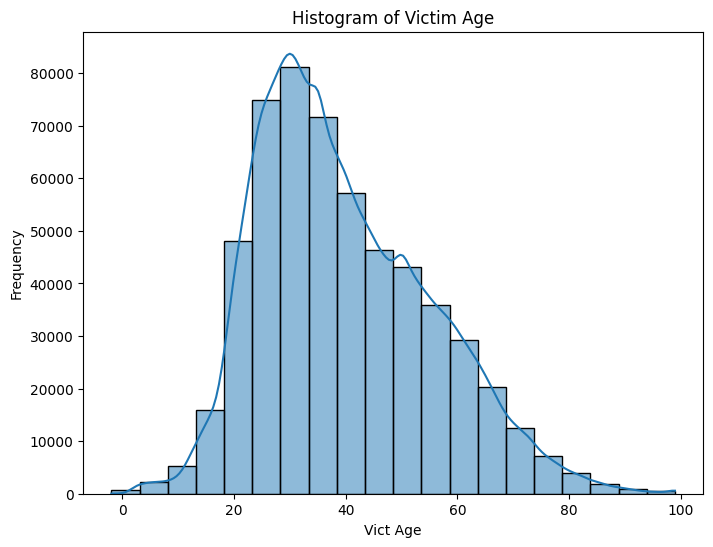

In [37]:
# Create a histogram to visualize the spread of Victim Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Vict Age'], bins=20, kde=True)
plt.xlabel("Vict Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Age")
plt.show()

In [38]:
# Calculate the z-score for Victim Age
z_scores = np.abs((df['Vict Age'] - df['Vict Age'].mean()) / df['Vict Age'].std())

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Identify potential outliers
potential_outliers = df[z_scores > threshold]

# Calculate the percentage of outliers
percentage_outliers = (len(potential_outliers) / len(df)) * 100

print(f"Percentage of Outliers in Victim Age: {percentage_outliers:.2f}%")

Percentage of Outliers in Victim Age: 0.36%


## **Exploratory Data Analysis**

In [39]:
df.describe()

,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 2,LAT,LON
count,559167.000000,559167.000000,559167.000000,559167.000000,559167.000000,559167.000000,559167.000000,559167.000000,559167.000000
mean,1120.889718,1.484651,498.397904,39.758954,333.732711,155.993340,74.208086,34.075527,-118.356631
std,614.371790,0.499765,221.697359,15.529560,216.867313,196.973716,257.134167,0.110294,0.105658
min,101.000000,1.000000,110.000000,-2.000000,101.000000,0.000000,0.000000,33.706100,-118.667600
25%,626.000000,1.000000,330.000000,28.000000,104.000000,0.000000,0.000000,34.015400,-118.434000
50%,1139.000000,1.000000,440.000000,37.000000,404.000000,0.000000,0.000000,34.059500,-118.324600
75%,1637.000000,2.000000,626.000000,50.000000,502.000000,400.000000,0.000000,34.166000,-118.274900
max,2199.000000,2.000000,956.000000,99.000000,971.000000,516.000000,999.000000,34.334300,-118.155400


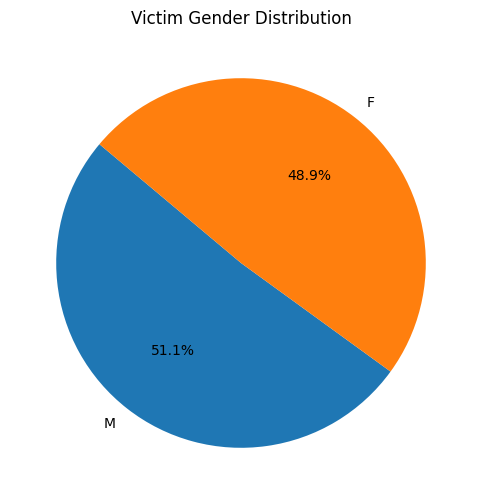

In [40]:
# Get the victim gender counts
victim_gender_counts = df['Vict Sex'].value_counts()

#create a pie chart of the victim gender counts
plt.figure(figsize=(6, 6))
plt.pie(victim_gender_counts, labels=victim_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Victim Gender Distribution")
plt.show()

In [41]:
temp =df['Vict Sex'].unique() # Get the unique values in the 'Vict Sex' column of the DataFrame 'df'
print(temp) # Print the unique values in the 'Vict Sex' column
print(len(df['AREA NAME'].unique())) # Print the number of unique values in the 'AREA NAME' column of the DataFrame 'df'

['F' 'M']
21


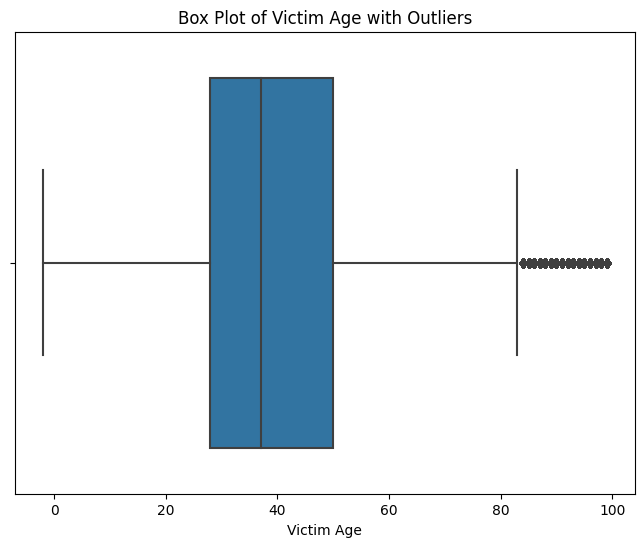

In [42]:
# Create a box plot for Victim Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vict Age'])
plt.xlabel("Victim Age")
plt.title("Box Plot of Victim Age with Outliers")
plt.show()

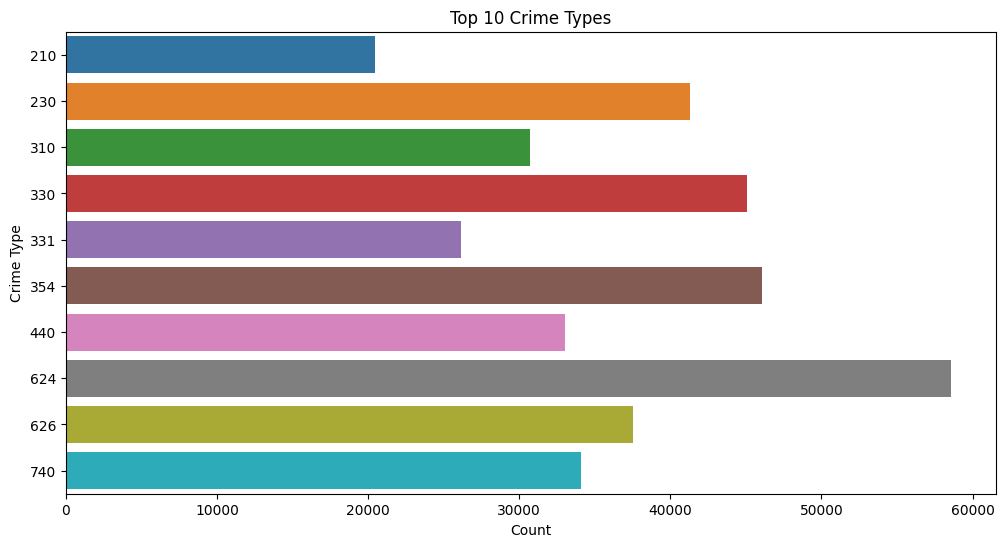

In [43]:
# Get the top 10 most frequent crime types and their counts from the 'Crm Cd' column
top_crime_types = df['Crm Cd'].value_counts().head(10)

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot using Seaborn, where 'x' represents counts and 'y' represents crime types
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, orient="h")

plt.title("Top 10 Crime Types")# Set the title of the plot
plt.xlabel("Count") # Label the x-axis
plt.ylabel("Crime Type") # Label the y-axis
plt.show() # Display the plot

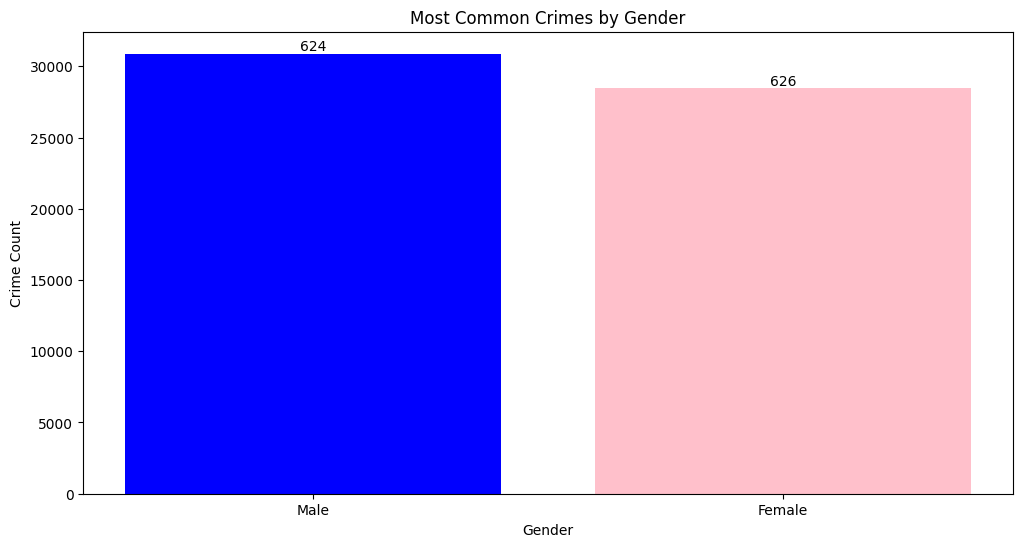

In [44]:
# Filter data for male victims
male_victims = df[df['Vict Sex'] == 'M']

# Filter data for female victims
female_victims = df[df['Vict Sex'] == 'F']

# Count the occurrences of each crime code description for males and females
male_crime_counts = male_victims['Crm Cd'].value_counts()
female_crime_counts = female_victims['Crm Cd'].value_counts()

# Get the most common crime for each gender
most_common_male_crime = male_crime_counts.idxmax()
most_common_female_crime = female_crime_counts.idxmax()

# Create a bar chart to show the most common crimes by gender
plt.figure(figsize=(12, 6))
plt.bar(['Male', 'Female'], [male_crime_counts[most_common_male_crime], female_crime_counts[most_common_female_crime]], color=['blue', 'pink'])
plt.title("Most Common Crimes by Gender")
plt.xlabel("Gender")
plt.ylabel("Crime Count")
plt.text(0, male_crime_counts[most_common_male_crime] , most_common_male_crime, ha='center', va='bottom')
plt.text(1, female_crime_counts[most_common_female_crime] , most_common_female_crime, ha='center', va='bottom')
plt.show()

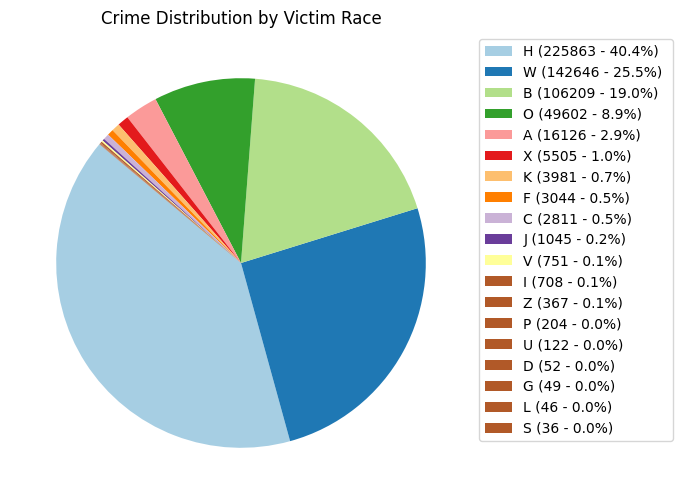

In [45]:
# Get the counts of victims by descent/race from the 'Vict Descent' column
victim_gender_counts = df['Vict Descent'].value_counts()

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Get the counts of victims by race
crime_counts_by_race = df['Vict Descent'].value_counts()

# Generate a range of colors using the 'Paired' colormap for the pie chart
colors = plt.cm.Paired(range(len(crime_counts_by_race)))

plt.pie(crime_counts_by_race, startangle=140, colors=colors) # Create a pie chart with crime counts by race, starting the angle at 140 degrees
plt.title("Crime Distribution by Victim Race") # Set the title of the pie chart

# Create a legend with colors and percentages
legend_labels = [f"{race} ({count} - {percentage:.1f}%) " for race, count, percentage in zip(crime_counts_by_race.index, crime_counts_by_race.values, (crime_counts_by_race / crime_counts_by_race.sum()) * 100)]
plt.legend(legend_labels, loc="best", bbox_to_anchor=(1, 1))

plt.show() #Display the plot

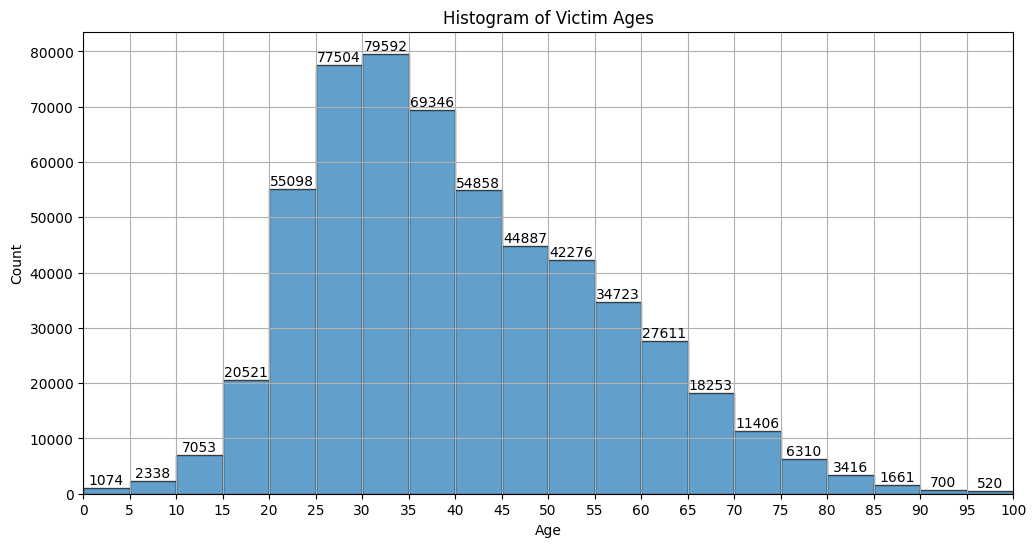

In [46]:
# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Generate a histogram of victim ages with specified bins and styling
hist, bins, _ = plt.hist(df['Vict Age'], bins=np.arange(0, 101, 5), edgecolor='k', alpha=0.7)

# Set the title of the histogram
plt.title("Histogram of Victim Ages")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Count")

plt.grid(True) # Display the grid on the plot

# Add counts on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + 2.5, hist[i] + 100, str(int(hist[i])), fontsize=10, ha='center', va='bottom')

plt.xticks(np.arange(0, 101, 5))  # Set X-axis ticks at 5-year intervals
plt.xlim(0, 100)  # Set X-axis limits
plt.show()

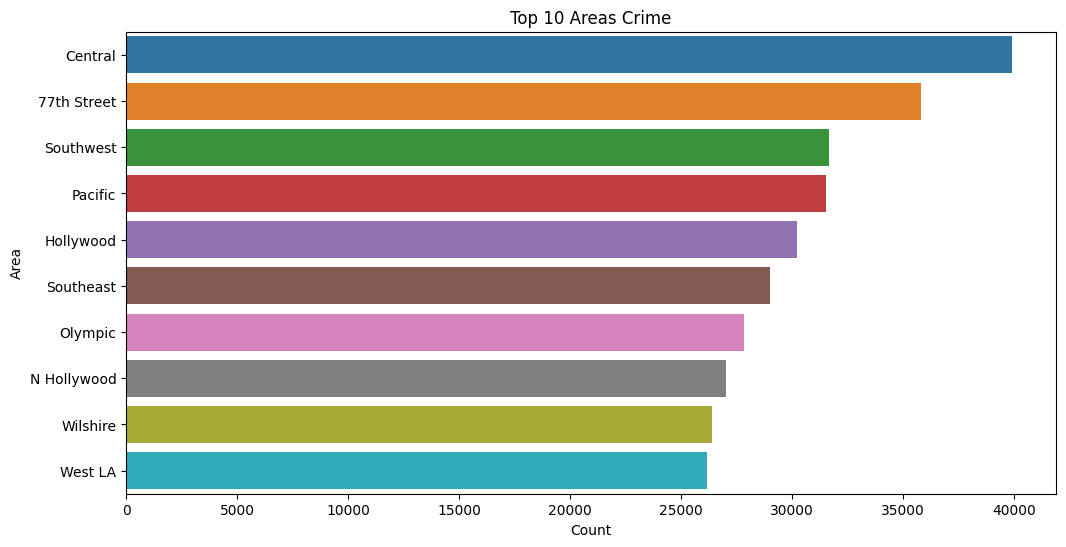

In [47]:
# Get the top 10 areas with the highest crime counts from the 'AREA NAME' column
top_crime_types = df['AREA NAME'].value_counts().head(10)

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot using Seaborn, where 'x' represents counts and 'y' represents areas
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, orient="h")

# Set the title and label the x-axis and y-axis
plt.title("Top 10 Areas Crime")
plt.xlabel("Count")
plt.ylabel("Area")

plt.show() # Display the plot

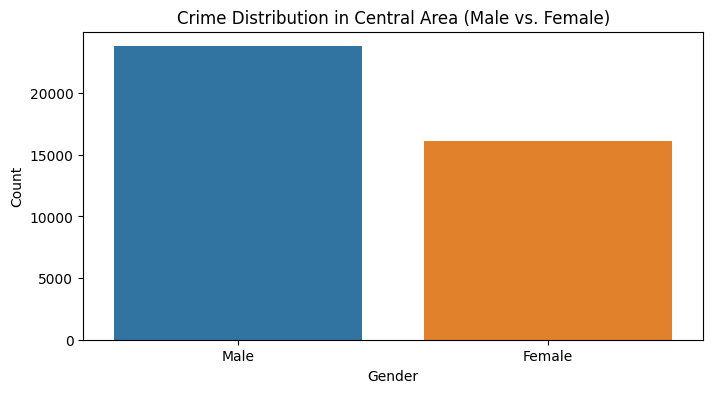

In [48]:
central_data = df[df['AREA NAME'] == 'Central']

# Calculate the count of male and female victims in the Central area
male_count = (central_data['Vict Sex'] == 'M').sum()
female_count = (central_data['Vict Sex'] == 'F').sum()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=['Male', 'Female'], y=[male_count, female_count])
plt.title("Crime Distribution in Central Area (Male vs. Female)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

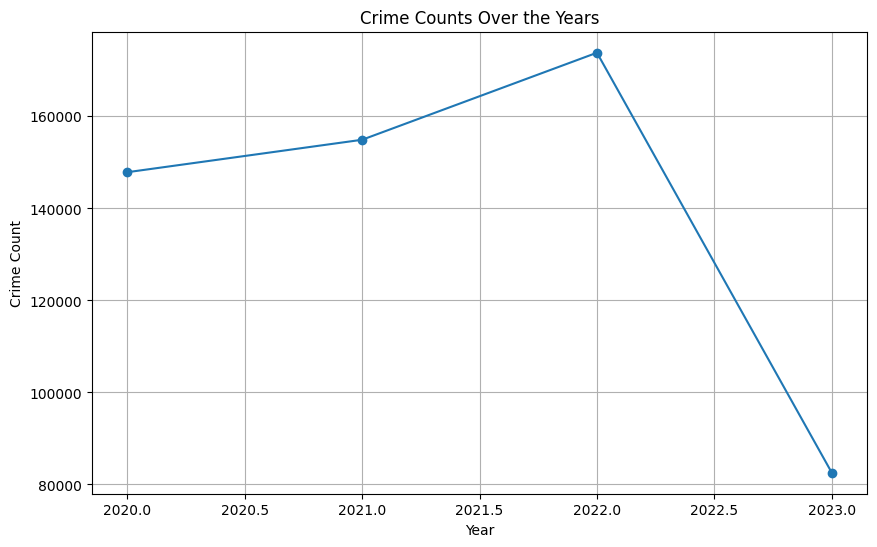

In [49]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract the year from the "Date Occurred" column and create a new column "Year"
df['Year'] = df['DATE OCC'].dt.year

# Count the number of crimes for each year
crime_counts_by_year = df['Year'].value_counts().sort_index()

# Create a line plot for crime counts over the years
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o', linestyle='-')
plt.title("Crime Counts Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()

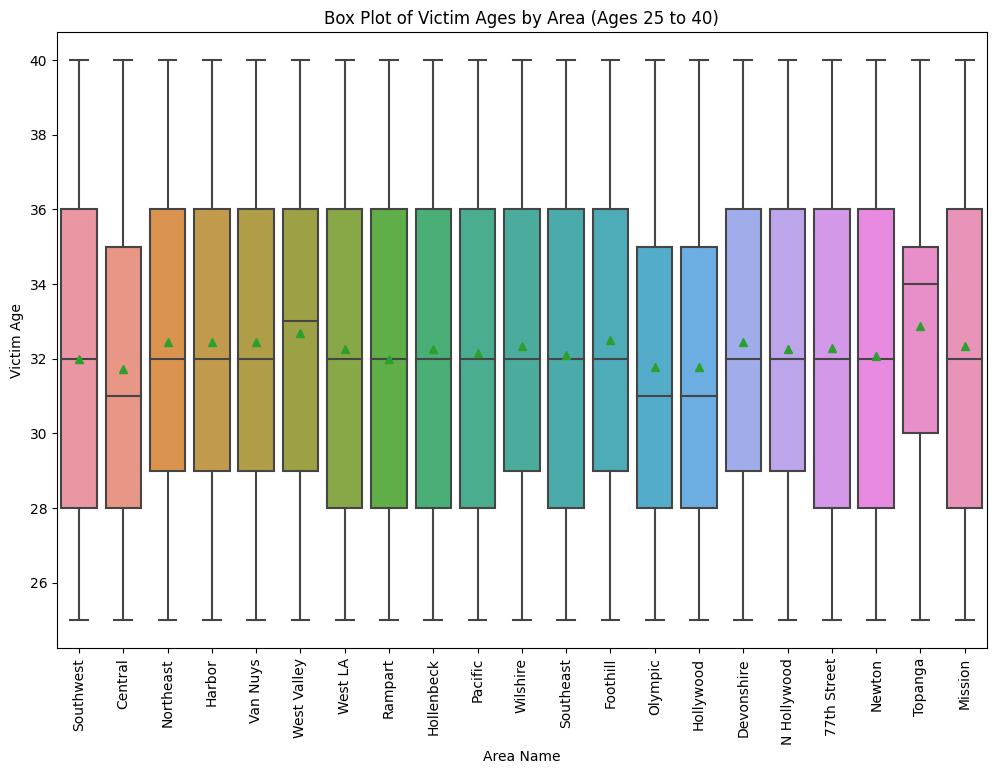

In [50]:
# Filter the dataset to include only records with victim ages between 25 and 40
filtered_data = df[(df['Vict Age'] >= 25) & (df['Vict Age'] <= 40)]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AREA NAME', y='Vict Age',showmeans =True, data=filtered_data)
plt.xticks(rotation=90)
plt.title("Box Plot of Victim Ages by Area (Ages 25 to 40)")
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.show()

Code 624 Mean 40.67340113302846 Median 39.0
Code 354 Mean 41.57814195789017 Median 38.0
Code 330 Mean 38.376906511555624 Median 35.0
Code 230 Mean 38.116955385657604 Median 36.0
Code 626 Mean 34.882467359445776 Median 33.0
Code 740 Mean 41.81884568009854 Median 39.0
Code 440 Mean 40.35561408288681 Median 37.0
Code 310 Mean 47.0384064108411 Median 45.0
Code 331 Mean 43.42593088668631 Median 41.0
Code 210 Mean 37.40916866233322 Median 35.0


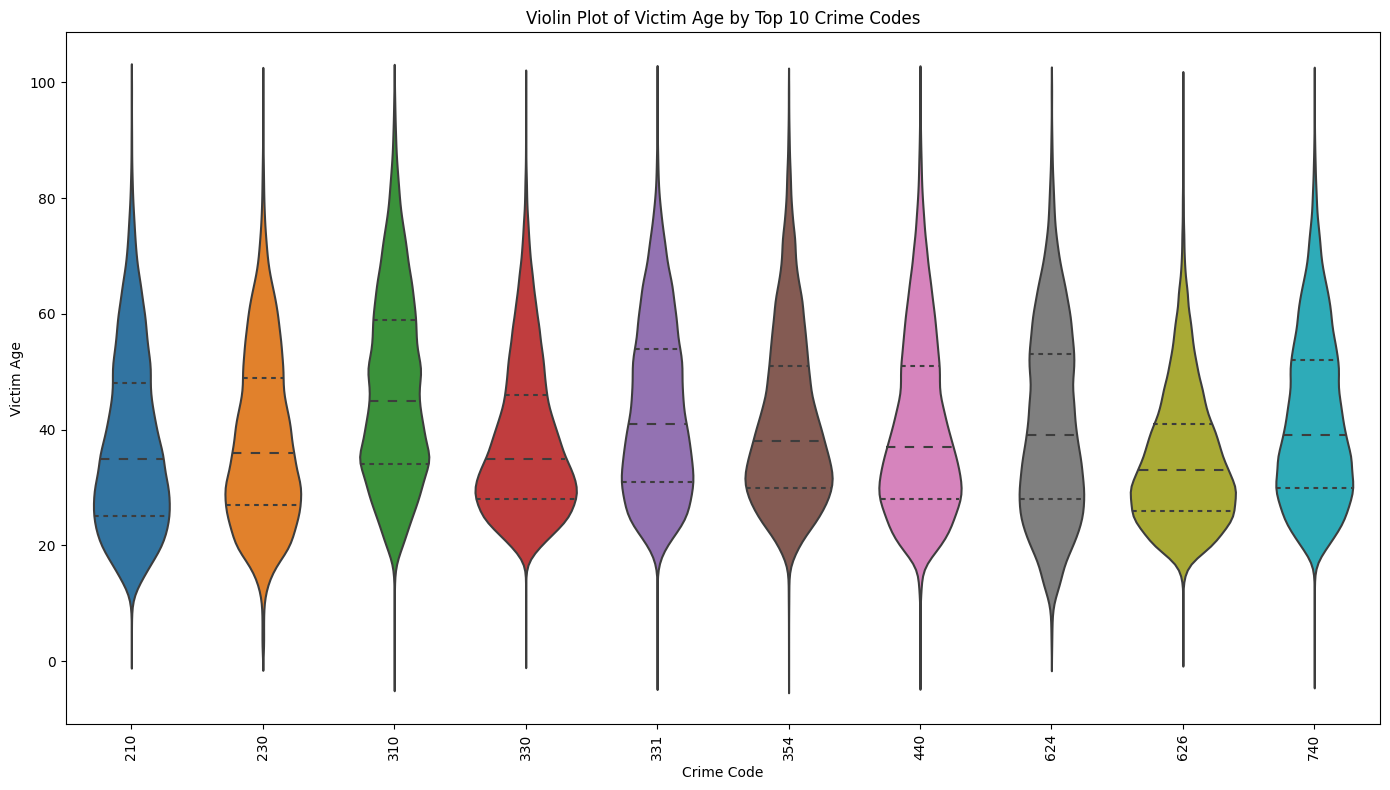

In [51]:
# Calculate the top 10 most frequent Crime Codes
top_10_crime_codes = df['Crm Cd'].value_counts().head(10).index.tolist()

# Filter the dataset for the top 10 Crime Codes
filtered_data = df[df['Crm Cd'].isin(top_10_crime_codes)]

# Create a violin plot
plt.figure(figsize=(14, 8))
ax = sns.violinplot(x='Crm Cd', y='Vict Age', data=filtered_data, inner="quart")
plt.xticks(rotation=90)
plt.title("Violin Plot of Victim Age by Top 10 Crime Codes")
plt.xlabel("Crime Code")
plt.ylabel("Victim Age")

# Create a legend for mean and median
legend_labels = []

for crime_code in top_10_crime_codes:
    mean_value = filtered_data[filtered_data['Crm Cd'] == crime_code]['Vict Age'].mean()
    median_value = filtered_data[filtered_data['Crm Cd'] == crime_code]['Vict Age'].median()
    print("Code" ,crime_code, "Mean",mean_value, "Median",median_value)


# Display the legend
# plt.legend(legend_labels, title="Statistics", loc="upper left", ncol=3)
# plt.legend(labels=legend_labels, title="Statistics", loc="upper left", ncol=3)
# plt.ylim(0, 150)
plt.tight_layout()
plt.show()

In [52]:
import folium

# Group the data to count the number of crimes at each latitude-longitude point
crime_counts = df.groupby(['LAT', 'LON']).size().reset_index(name='crime_count')

# Create a folium map centered at a specific location
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)  # Los Angeles coordinates

# Add bubbles for the top 10 locations with highest crime counts
top_10_locations = crime_counts.nlargest(30, 'crime_count')
for index, row in top_10_locations.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=row['crime_count'] / 100,  # Adjust the bubble size
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.4,  # Set transparency (0.0 to 1.0)
    ).add_to(m)

# Display the map
m.save("bubble_chart_with_map.html")  # Save the map as an HTML file

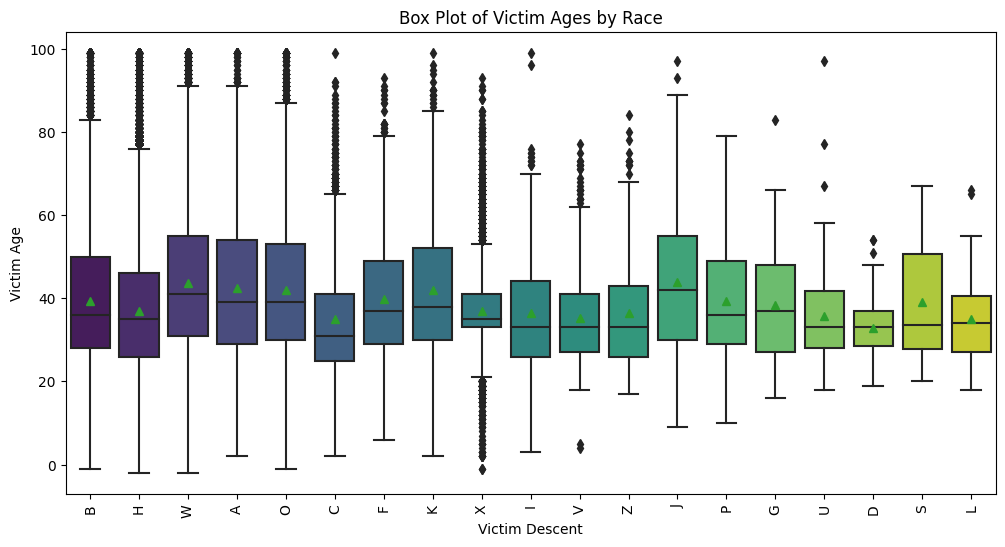

In [53]:
# Create a box plot for victim ages by area
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Vict Descent', y='Vict Age', showmeans=True, palette='viridis')
plt.title("Box Plot of Victim Ages by Race")
plt.xlabel("Victim Descent")
plt.ylabel("Victim Age")
plt.xticks(rotation=90)
plt.show()

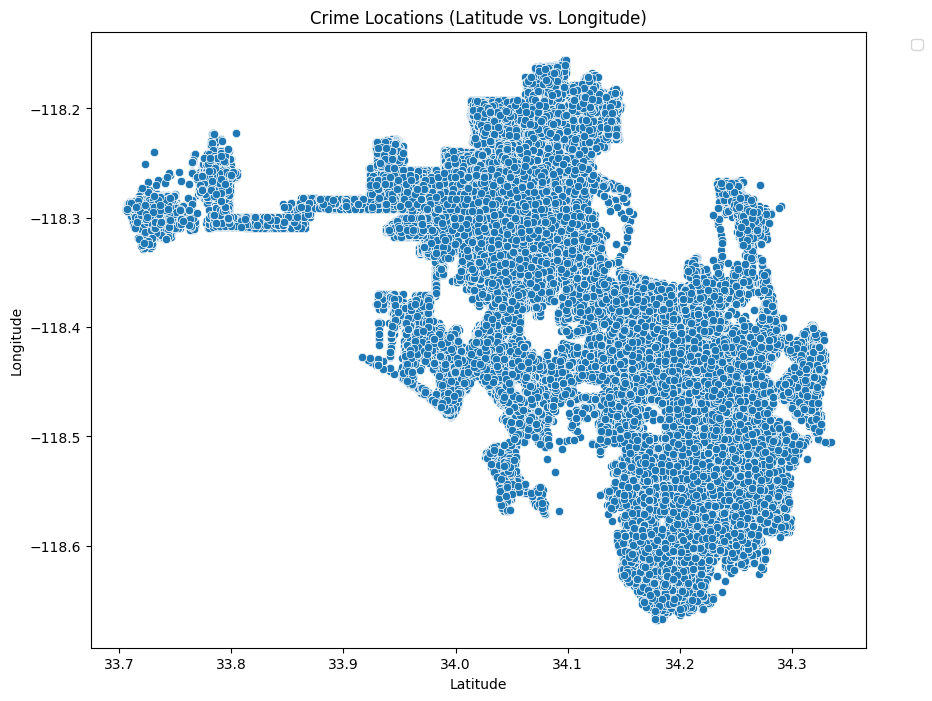

In [54]:
#Create a new figure with the specified size (10 units wide and 8 units tall)
plt.figure(figsize=(10, 8))

# Create a scatterplot using Seaborn to visualize crime locations on a map
# 'x' represents Latitude ('LAT'), 'y' represents Longitude ('LON'), and 'hue' represents Crime Code ('Crm Cd')
sns.scatterplot(data=df, x='LAT', y='LON')

# Set the title and add the x-axis and y-axis label
plt.title("Crime Locations (Latitude vs. Longitude)")
plt.ylabel("Longitude")
plt.xlabel("Latitude")

# Add a legend to the plot, positioning it outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

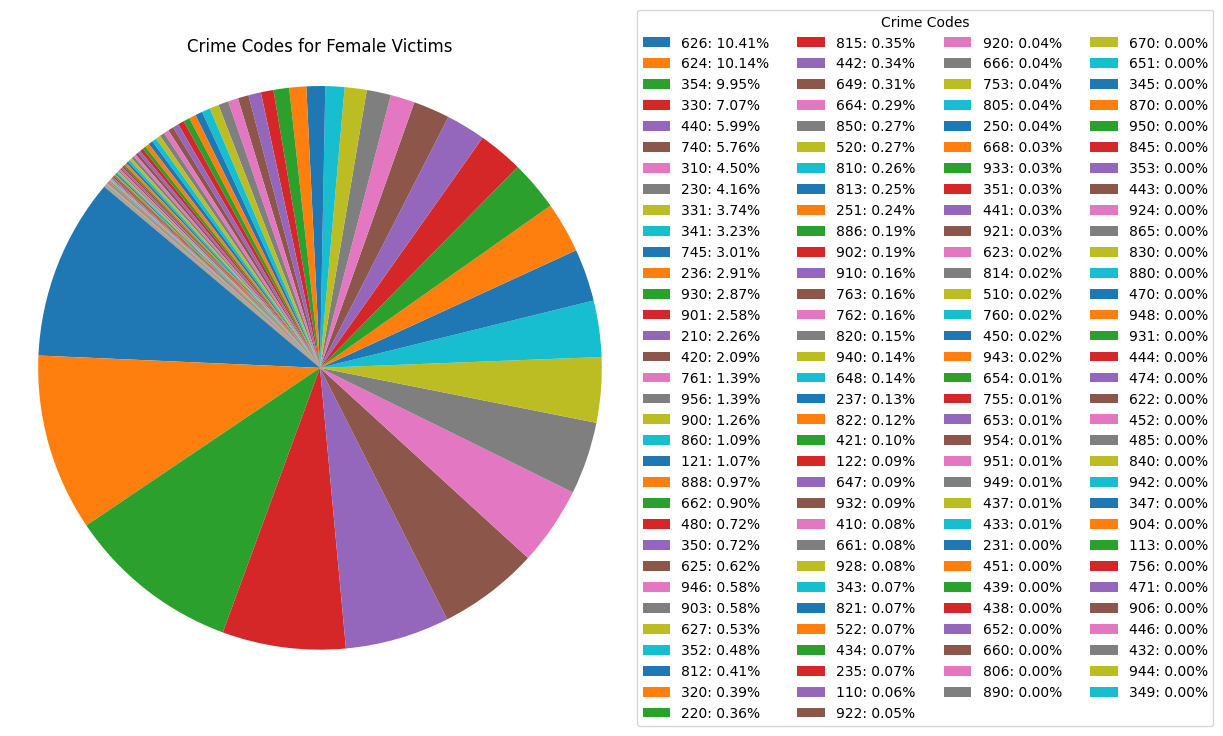

In [55]:
# Filter data for female victims
female_victims = df[df['Vict Sex'] == 'F']

# Count the occurrences of each crime code for female victims
crime_counts_female = female_victims['Crm Cd'].value_counts()
percentages = [(count / len(female_victims)) * 100 for count in crime_counts_female]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts_female, labels=None, autopct='', startangle=140)
plt.title("Crime Codes for Female Victims")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a legend with crime codes
# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)
legend_labels = [f"{code}: {percent:.2f}%" for code, percent in zip(crime_counts_female.index, percentages)]
plt.legend(legend_labels, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)

# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

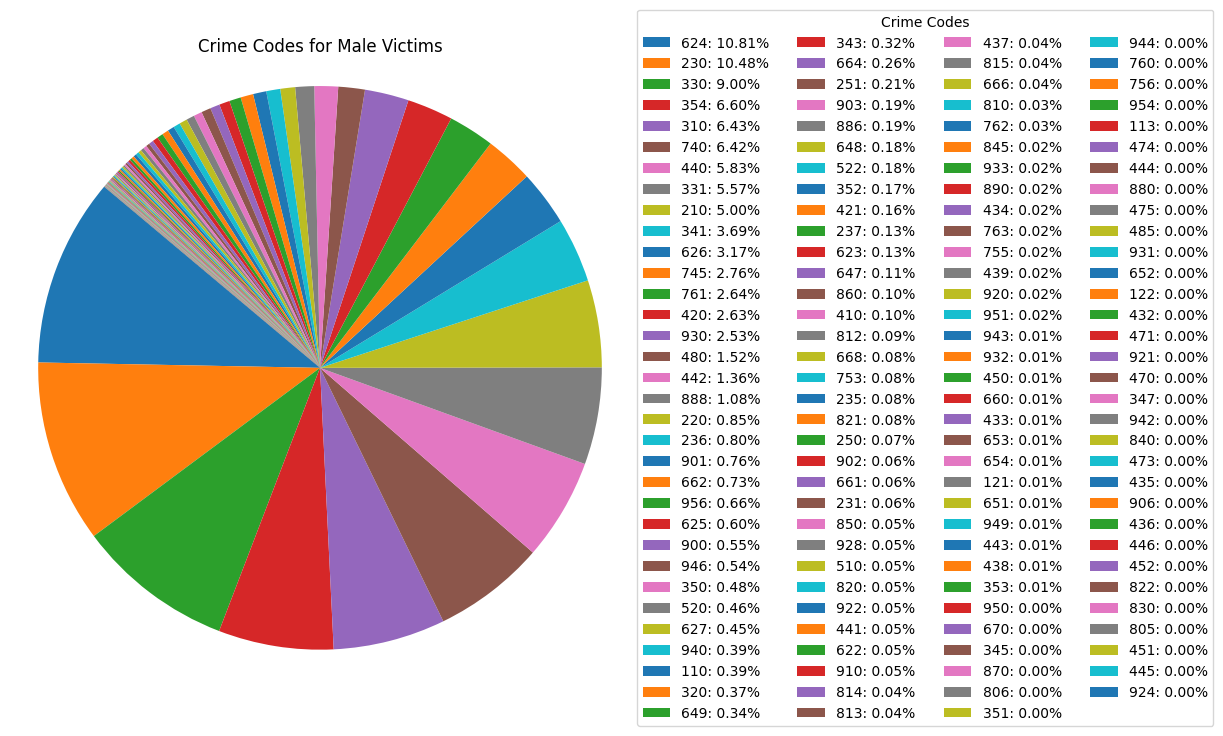

In [56]:
# Filter data for female victims
male_victims = df[df['Vict Sex'] == 'M']

# Count the occurrences of each crime code for female victims
crime_counts_male = male_victims['Crm Cd'].value_counts()
percentages = [(count / len(male_victims)) * 100 for count in crime_counts_male]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts_male, labels=None, autopct='', startangle=140)
plt.title("Crime Codes for Male Victims")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a legend with crime codes
# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)
legend_labels = [f"{code}: {percent:.2f}%" for code, percent in zip(crime_counts_male.index, percentages)]
plt.legend(legend_labels, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)

# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [57]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M')

# Define time intervals
intervals = [(pd.Timestamp('00:01:00').time(), pd.Timestamp('06:00:00').time()),
             (pd.Timestamp('06:01:00').time(), pd.Timestamp('12:00:00').time()),
             (pd.Timestamp('12:01:00').time(), pd.Timestamp('18:00:00').time()),
             (pd.Timestamp('18:01:00').time(), pd.Timestamp('23:59:59').time())]

# Create labels for the intervals
labels = ['00:01-06:00', '06:01-12:00', '12:01-18:00', '18:01-24:00']

# Extract the time component (hours and minutes)
df['Time'] = df['TIME OCC'].dt.time

# Define a custom categorization function
def categorize_time(time):
    for i, interval in enumerate(intervals):
        if interval[0] <= time <= interval[1]:
            return labels[i]
    return None

# Apply the custom categorization function to create the 'Time Interval' column
df['Time Interval'] = df['Time'].apply(categorize_time)

# Count the number of occurrences in each interval
crime_counts = df['Time Interval'].value_counts().reindex(labels, fill_value=0)

# Display the results
print(crime_counts)

Time Interval
00:01-06:00     91909
06:01-12:00    136705
12:01-18:00    175553
18:01-24:00    155000
Name: count, dtype: int64


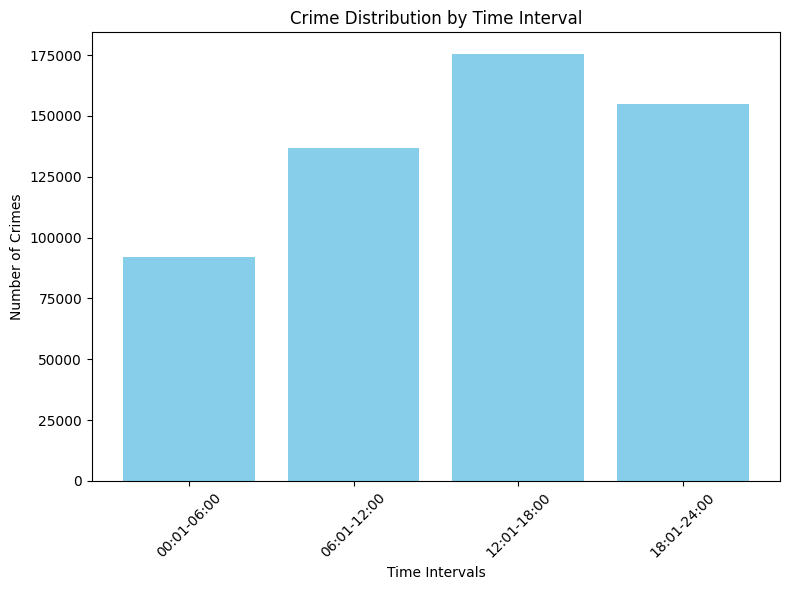

In [58]:
# Create a new figure with a specified size (8 units wide and 6 units tall)
plt.figure(figsize=(8, 6))

# Create a bar plot with labels and crime counts, using a sky blue color
plt.bar(labels, crime_counts, color='skyblue')

# Label the x-axis as 'Time Intervals' and y-axis as 'Number of Crimes'
plt.xlabel('Time Intervals')
plt.ylabel('Number of Crimes')

# Set the title
plt.title('Crime Distribution by Time Interval')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
#Check the shape of the data frame to determine the number of rows and columns
df.shape

(559167, 24)